App link: https://svd-guessing-game.anvil.app/

One page summary link: https://docs.google.com/document/d/1ZU8PPeB0ZhvtlO82zXy9KmipGH8_yva7ivBfghkBWfY/edit?usp=sharing

In [ ]:
#@title Run this block once (wait until green checkmark on the left shows up)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import linalg
from PIL import Image
import requests
from io import BytesIO
import scipy.misc
from scipy import ndimage
import random
from sklearn.datasets import fetch_olivetti_faces
from skimage import io
import base64
import copy

data = fetch_olivetti_faces()
imgs = data.images
answers = ["Anshi Kanodia", "Arnav Naik", "Austin Xu", "Bruce Bei", "Charles Jurisaga", "Connor Chung", "David Kim", "Erica Wang", "Helen Lai", "Jay Bhatnagar", "Justin Luo", "Jenny Hu", "Justin Wang", "Kate Piekarski", "Keith Chiang", "Kyle Xu", "Leon Chen", "Lillia Finnegan", "Luke Qiao", "Manav Khanvilkar", "Melinda Chang", "Priyanka Soe", "Mr. Shay", "Shervin Goudarzi", "Yaj Jhajhria", "Alex Proshkin", "Mr. Killeen", "Selena Xiang", "Mr. Thornton", "Grace Li",\
           "Adin Ross", "Bruce Lee", "Bruno Mars", "Cristiano Ronaldo", "Drake", "Greta Thunberg", "Ice Spice", "Kim Kardashian", "Lana Del Rey", "Lebron James", "Lionel Messi", "Logan Paul", "Mark Cuban", "Mr. Beast", "Muhammad Ali", "Steph Curry", "Steve Harvey", "Taylor Swift", "The Rock", "The Weeknd"]
imported_data = ["https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903302112.jpeg%3Falt%3Dmedia%26token%3D1a2b9377-8df4-41f6-bbdb-10a62e4b48fc&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903282328.jpeg%3Falt%3Dmedia%26token%3D88dd88f0-de55-41bc-8ee1-0d20900c338c&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903265947.jpeg%3Falt%3Dmedia%26token%3D465f6871-82ff-4a6d-8337-ad862fb505ca&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903246724.jpeg%3Falt%3Dmedia%26token%3Da2300592-2f31-49cc-97c7-d690d9e88169&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903223578.jpeg%3Falt%3Dmedia%26token%3Dab6149eb-9bc6-4b61-80eb-24eae338a97c&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903202878.jpeg%3Falt%3Dmedia%26token%3Da1fac543-b548-4a8b-a682-a37b12091eb1&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903184744.jpeg%3Falt%3Dmedia%26token%3Dbc12705b-2fd1-4c2d-ab65-e70587b0be30&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903162486.jpeg%3Falt%3Dmedia%26token%3Dbb065fda-8606-4c27-b733-0d18763ea4ca&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903087635.jpeg%3Falt%3Dmedia%26token%3D05f52a0c-8c46-4f9c-a5b9-9e90d323b7c2&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903064397.jpeg%3Falt%3Dmedia%26token%3D4f26f4f5-b9a1-4bf5-a7bc-3595817ce5d9&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903027161.jpeg%3Falt%3Dmedia%26token%3D41dce1fa-6b30-48b7-ad7f-5e34af6e4807&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684903005732.jpeg%3Falt%3Dmedia%26token%3D18f21f74-beb6-42dc-9a86-2d1eb78d2dad&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684902987530.jpeg%3Falt%3Dmedia%26token%3D0337fa9e-47aa-4dc4-b676-9f03bd301062&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684902966206.jpeg%3Falt%3Dmedia%26token%3D5a982f01-255d-4c8a-a225-1352e01943b5&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684902915019.jpeg%3Falt%3Dmedia%26token%3D90eae180-f4d9-4b89-94fa-965658495b30&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684902873352.jpeg%3Falt%3Dmedia%26token%3D728a51cc-6635-4c12-9a57-06e71e52a9ce&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684902788478.jpeg%3Falt%3Dmedia%26token%3Dd5951c8a-9cac-4e0b-89a1-a504af24529d&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684902752308.jpeg%3Falt%3Dmedia%26token%3D066bf696-be57-45f2-a858-599d7e7dba62&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684902723312.jpeg%3Falt%3Dmedia%26token%3D3d7283c1-5636-40fe-9a1e-987b9bc4a910&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684902685419.jpeg%3Falt%3Dmedia%26token%3Dc44a48ec-4fd9-48c2-baec-048e31534919&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684902630702.jpeg%3Falt%3Dmedia%26token%3D453d6daf-15e4-4dcc-8510-1a8d125930a7&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684872144560.jpeg%3Falt%3Dmedia%26token%3D89bc6890-607e-42e1-910a-e0c4abe504d3&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684872122558.jpeg%3Falt%3Dmedia%26token%3D49b554e2-6190-4c06-a717-d09d5f01d148&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684872086130.jpeg%3Falt%3Dmedia%26token%3D546d5555-0641-4c25-acc6-2041d508e19e&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684872013153.jpeg%3Falt%3Dmedia%26token%3D54dad818-0d0d-4a41-a642-48d703f9aec5&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871627187.jpeg%3Falt%3Dmedia%26token%3D96dd7f70-9bca-4a62-a84b-4ac5a545cd9f&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871574443.jpeg%3Falt%3Dmedia%26token%3D0129db02-f28d-45b5-9a0a-e960808016aa&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871531786.jpeg%3Falt%3Dmedia%26token%3D17a88ad9-c282-4413-8d83-d67b1ded1c06&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871500499.jpeg%3Falt%3Dmedia%26token%3D5a3e0ff0-d6df-4739-9d4b-eebacac9650b&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871464419.jpeg%3Falt%3Dmedia%26token%3Da67ca75b-8506-4c2c-b41b-e82acec91980&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871435005.jpeg%3Falt%3Dmedia%26token%3D43e01cef-e56f-4b67-a6ba-da7cdbb3a326&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871367692.jpeg%3Falt%3Dmedia%26token%3D583a1eea-ade6-4691-9e32-87ad1e5c0638&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871283221.jpeg%3Falt%3Dmedia%26token%3D44e2adb4-01ff-4ecd-87b4-8c0265a3911d&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871199046.jpeg%3Falt%3Dmedia%26token%3D75700112-accb-44d2-9957-25ecc13ca5cb&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871107911.jpeg%3Falt%3Dmedia%26token%3D934d4b8a-7482-43c8-a8e1-e1a5154e7994&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684871024446.jpeg%3Falt%3Dmedia%26token%3D7bc4946c-4d74-48b8-9551-54a781b20ff6&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684870967254.jpeg%3Falt%3Dmedia%26token%3D99368c26-372c-4fcc-ae12-330d7f060ea3&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684870934406.jpeg%3Falt%3Dmedia%26token%3D4df5f6da-e87f-4d82-9f92-a0e0e290e301&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684870851502.jpeg%3Falt%3Dmedia%26token%3D73318f14-f511-440a-8aab-6846cd252db2&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684870779557.jpeg%3Falt%3Dmedia%26token%3Dc942b849-036b-45da-a44d-5960954a72e2&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684870709995.jpeg%3Falt%3Dmedia%26token%3D86fd2256-13f6-4fdf-94a2-b291e13e963b&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684870650738.jpeg%3Falt%3Dmedia%26token%3D0c15bce6-5504-4007-9ce6-30e66b925bae&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684868709590.jpeg%3Falt%3Dmedia%26token%3Da26be55b-9101-4541-8e93-5c7eaf3a3f55&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684868692813.jpeg%3Falt%3Dmedia%26token%3D3f573346-8a6a-40d6-bdf1-79749a95c63a&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684868683468.jpeg%3Falt%3Dmedia%26token%3Dbdae730b-4c61-4941-b914-783e06cbf01d&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684868664621.jpeg%3Falt%3Dmedia%26token%3D5db1c60b-8426-4a5e-9ac3-f67b74cf397a&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684868652185.jpeg%3Falt%3Dmedia%26token%3D8a5919f9-a8f3-4cb7-9edb-a247f5abb76f&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684868632709.jpeg%3Falt%3Dmedia%26token%3D7067b2f5-6327-4e12-8467-0f6584d8dd20&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684867213669.jpeg%3Falt%3Dmedia%26token%3D41167b8c-7763-4bc6-8125-e65e0844cc29&w=128&q=75",\
                  "https://www.ootd.day/_next/image?url=https%3A%2F%2Ffirebasestorage.googleapis.com%2Fv0%2Fb%2Foutfit-of-the-day-2cf30.appspot.com%2Fo%2Fuploads%252F1jbnLFyiApePIOQRs0JjjjvoJxF2%252F1684867193245.jpeg%3Falt%3Dmedia%26token%3D2f922ffd-a3cc-4056-bf66-71e1d12293ad&w=128&q=75"]
for link in imported_data:
  img = Image.open(BytesIO(requests.get(link).content))
  img = img.convert('L')
  img = np.asarray(img)
  img = (img-np.min(img))/(np.max(img)-np.min(img))
  img = img.reshape((1, 64, 64))
  imgs = np.insert(imgs, 0, img, axis=0)
M = imgs.reshape((-1, imgs.shape[1]*imgs.shape[2])).T
U, s, VT = linalg.svd(M)
Sigma = np.zeros((M.shape[0], M.shape[1]))
Sigma[:min(M.shape[0], M.shape[1]), :min(M.shape[0], M.shape[1])] = np.diag(s)

If the text box for input isn't showing up, click "Runtime" -> "Restart Runtime" in the top menu and rerun the block above

Welcome to our game!

------------------

Enter 0 for normal mode or 1 for hard mode:
0

------------------

Number of guesses: 0
Answer options:
   Bruno Mars
   Lillia Finnegan
   Shervin Goudarzi
   Steve Harvey
   Drake


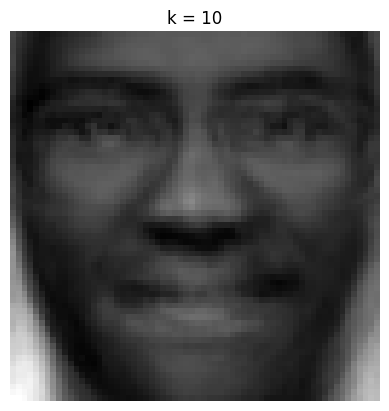

Enter your guess (or press enter to skip):
steve harvey
You won!

------------------

Number of guesses: 1
The answer was Steve Harvey!



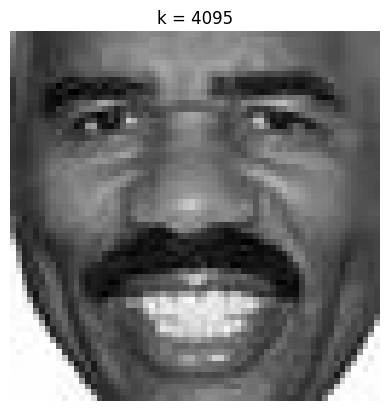

Press enter to restart or Q to quit:


------------------

Enter 0 for normal mode or 1 for hard mode:
1

------------------

Number of guesses: 0

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


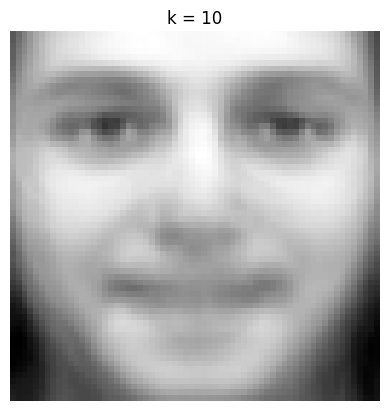

Enter your guess (or press enter to skip):
kate piekarski
Sorry, wrong answer :(

------------------

Number of guesses: 1

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


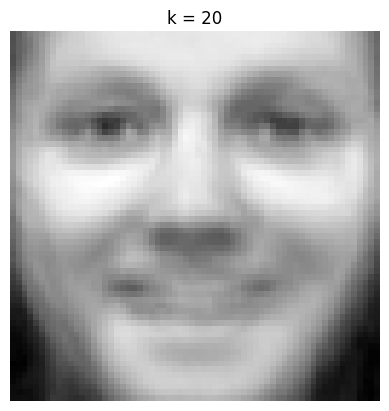

Enter your guess (or press enter to skip):
lillia finnegan
You won!

------------------

Number of guesses: 2
The answer was Lillia Finnegan!



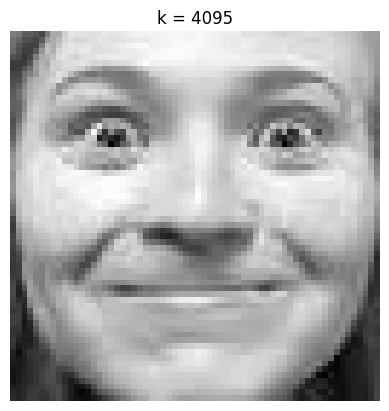

Press enter to restart or Q to quit:


------------------

Enter 0 for normal mode or 1 for hard mode:
1

------------------

Number of guesses: 0

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


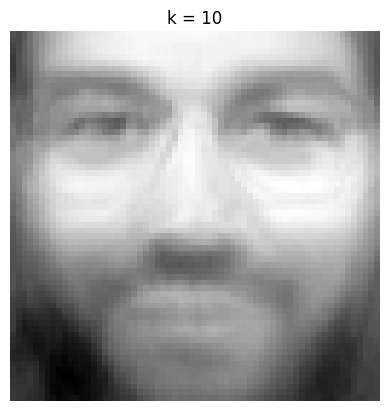

Enter your guess (or press enter to skip):
mark cuban
Sorry, wrong answer :(

------------------

Number of guesses: 1

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


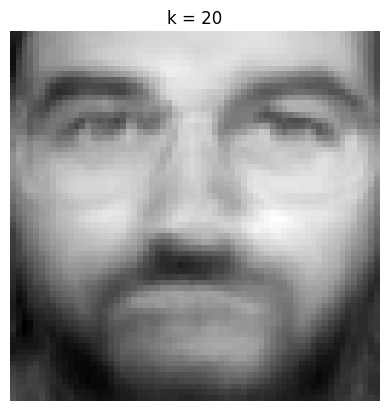

Enter your guess (or press enter to skip):
drake
You won!

------------------

Number of guesses: 2
The answer was Drake!



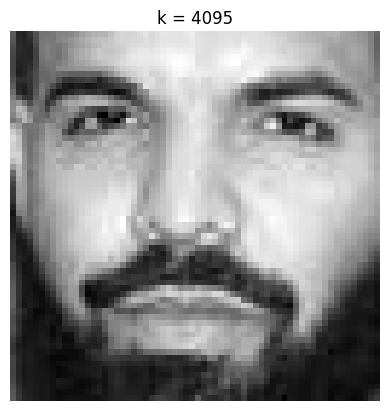

Press enter to restart or Q to quit:


------------------

Enter 0 for normal mode or 1 for hard mode:
1

------------------

Number of guesses: 0

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


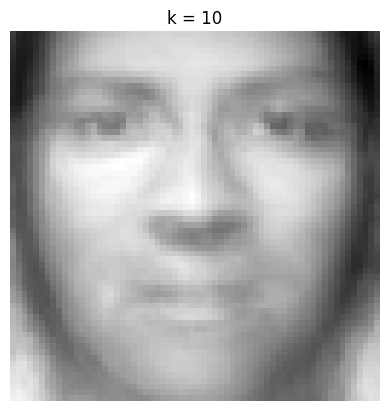

Enter your guess (or press enter to skip):
muhammad ali
Sorry, wrong answer :(

------------------

Number of guesses: 1

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


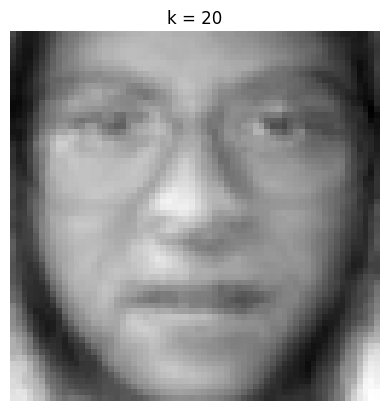

Enter your guess (or press enter to skip):
bruno mars
Sorry, wrong answer :(

------------------

Number of guesses: 2

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


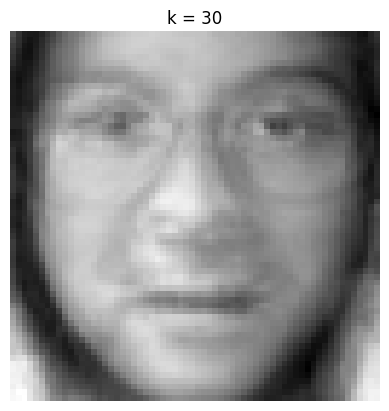

Enter your guess (or press enter to skip):
greta thunberg
Sorry, wrong answer :(

------------------

Number of guesses: 3

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


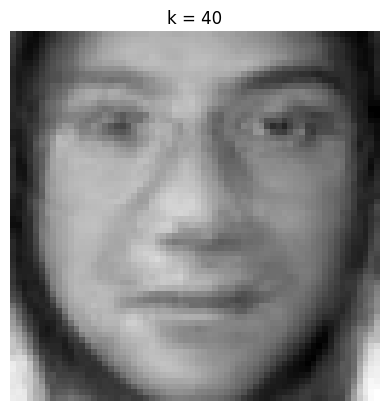

Enter your guess (or press enter to skip):
anshi kanodia
Sorry, wrong answer :(

------------------

Number of guesses: 4

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


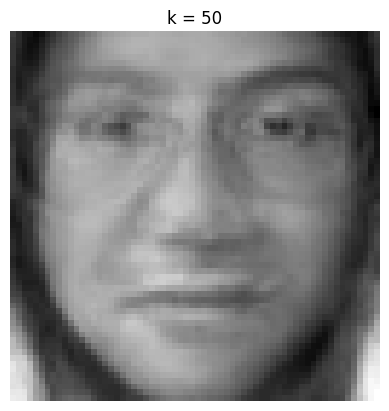

Enter your guess (or press enter to skip):
ice spice
Sorry, wrong answer :(

------------------

Number of guesses: 5

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


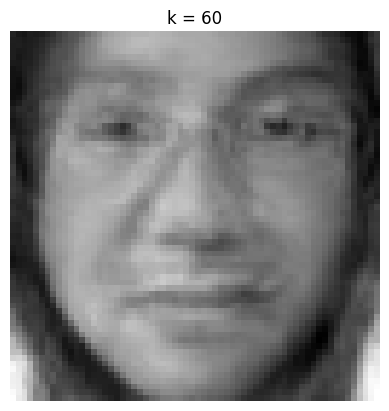

Enter your guess (or press enter to skip):

Sorry, wrong answer :(

------------------

Number of guesses: 6

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


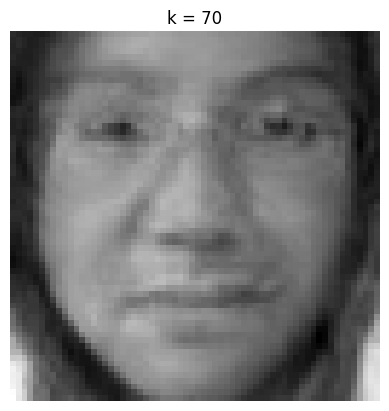

Enter your guess (or press enter to skip):

Sorry, wrong answer :(

------------------

Number of guesses: 7

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


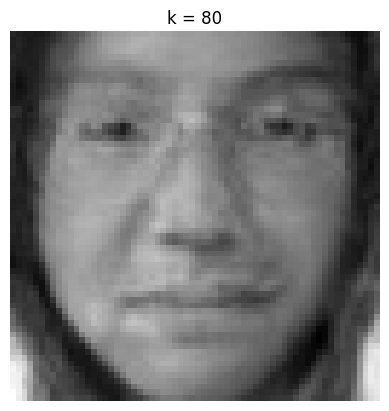

Enter your guess (or press enter to skip):
luke qiao
You won!

------------------

Number of guesses: 8
The answer was Luke Qiao!



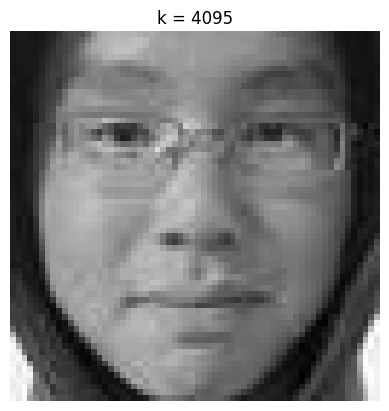

Press enter to restart or Q to quit:


------------------

Enter 0 for normal mode or 1 for hard mode:
1

------------------

Number of guesses: 0

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


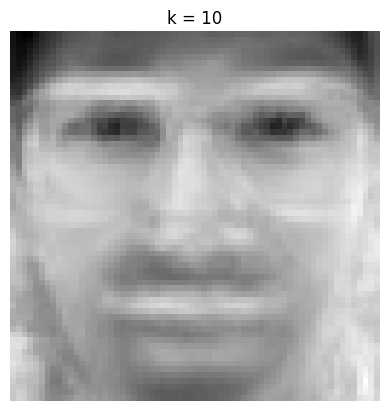

Enter your guess (or press enter to skip):
david kim
You won!

------------------

Number of guesses: 1
The answer was David Kim!



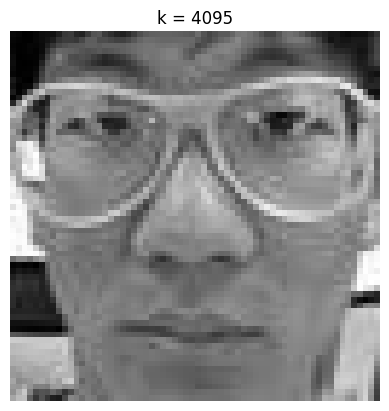

Press enter to restart or Q to quit:


------------------

Enter 0 for normal mode or 1 for hard mode:
1

------------------

Number of guesses: 0

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


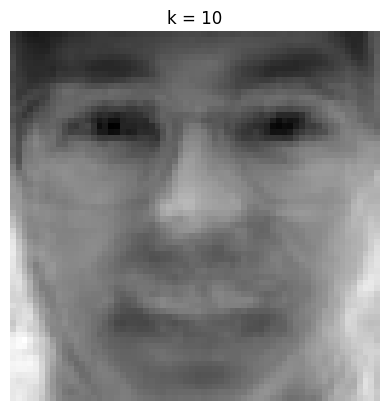

Enter your guess (or press enter to skip):
keith chiang
Sorry, wrong answer :(

------------------

Number of guesses: 1

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


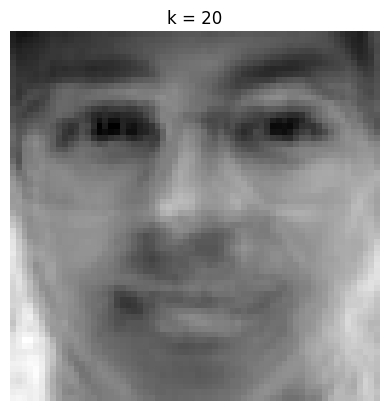

Enter your guess (or press enter to skip):
manav khanvilkar
Sorry, wrong answer :(

------------------

Number of guesses: 2

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


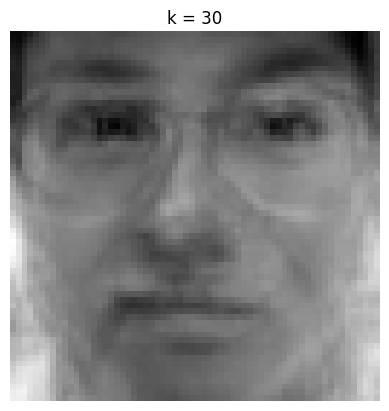

Enter your guess (or press enter to skip):
jay bhatnagar
Sorry, wrong answer :(

------------------

Number of guesses: 3

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


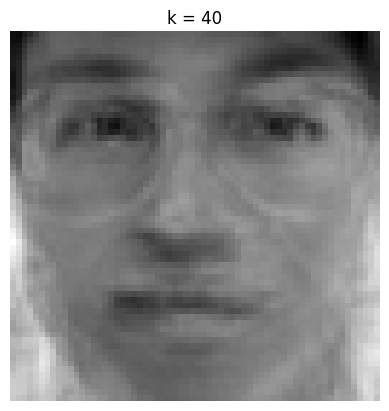

Enter your guess (or press enter to skip):

Sorry, wrong answer :(

------------------

Number of guesses: 4

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


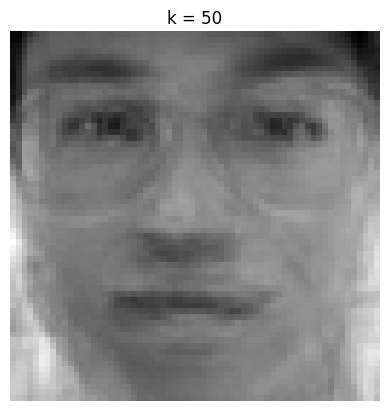

Enter your guess (or press enter to skip):

Sorry, wrong answer :(

------------------

Number of guesses: 5

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


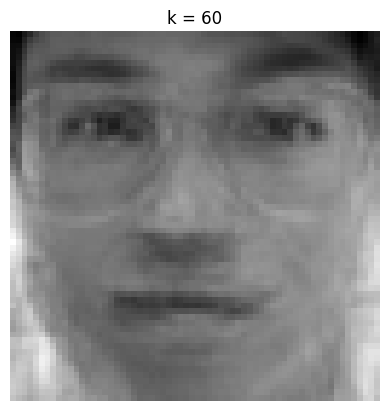

Enter your guess (or press enter to skip):

Sorry, wrong answer :(

------------------

Number of guesses: 6

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


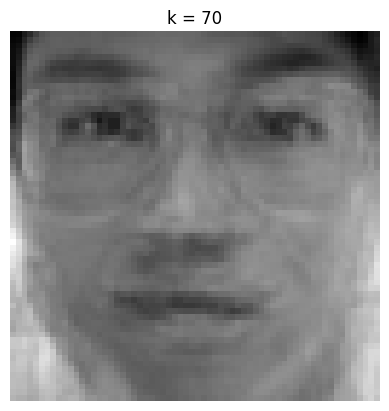

Enter your guess (or press enter to skip):

Sorry, wrong answer :(

------------------

Number of guesses: 7

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


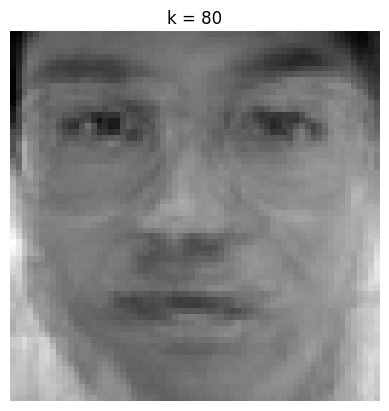

Enter your guess (or press enter to skip):

Sorry, wrong answer :(

------------------

Number of guesses: 8

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


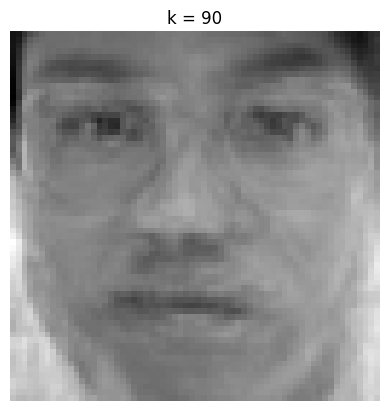

Enter your guess (or press enter to skip):

Sorry, wrong answer :(

------------------

Number of guesses: 9

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


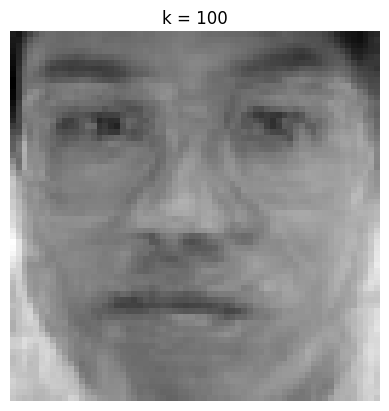

Enter your guess (or press enter to skip):

Sorry, wrong answer :(

------------------

Number of guesses: 10

See following link for all answer options:
https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing


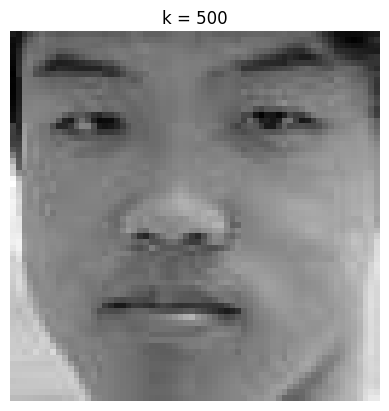

In [ ]:
#@title Play Game

class Game():
  def __init__(self, imgs, U, Sigma, VT, answers):
    self.imgs, self.U, self.Sigma, self.VT, self.answers = imgs, U, Sigma, VT, answers
    self.x = np.zeros((self.imgs.shape[0], 1))
    self.mode = False
    self.reset()

  def make_plot(self, k):
    mat_approx = self.U[:, :k] @ self.Sigma[:k, :k] @ self.VT[:k, :] @ self.x
    plt.imshow(mat_approx.reshape((64,64)), cmap='gray')
    plt.title("k = {}".format(k))
    plt.axis("off")
    plt.show()

  def do_stuff(self):
    print("Number of guesses:", self.count)
    if self.hard == False:
      ans = copy.deepcopy(self.answers)
      random.shuffle(ans)
      ans = ans[:5]
      if self.answer not in ans:
        i = np.random.randint(0, 5)
        ans[i] = self.answer
      print("Answer options:\n  ", '\n   '.join(ans))
    else:
      print("\nSee following link for all answer options:")
      print("https://docs.google.com/document/d/1MKONF_a3c_vUsD2r4z4a27RqTN0YQWGvZyrbzO91SlY/edit?usp=sharing")
    k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500]
    k = k_list[self.count]
    img_data = self.make_plot(k)
    guess = input("Enter your guess (or press enter to skip):\n")
    return self.check_win(guess)

  def check_win(self, guess):
    if self.count < 12 and self.win == False:
      if(guess.lower() == self.answer.lower()):
        print("You won!\n\n------------------\n")
        self.win = True
      else:
        print("Sorry, wrong answer :(\n\n------------------\n")
    return self.win

  def run_game(self):
    while self.win == False and self.count < 11:
      self.win = self.do_stuff()
      self.count += 1
    print("Number of guesses:", self.count)
    if(self.count == 11):
      print("You have reached the maximum number of guesses!")
    print("The answer was " + self.answer + "!\n")
    self.make_plot(4095)
    restart = input("Press enter to restart or Q to quit:\n")
    while restart != "" and restart.lower() != "q":
      restart = input("Invalid input\nPress enter to restart or Q to quit:\n")
    if restart.lower() != "q":
      print("\n------------------\n")
      self.reset()
      self.run_game()
    else:
      print("\nThanks for playing!")

  def reset(self):
    mode = input("Enter 0 for normal mode or 1 for hard mode:\n")
    while mode != "0" and mode != "1":
      mode = input("Invalid input\nEnter 0 for normal mode and 1 for hard mode: ")
    if mode == "0":
      self.hard = False
    else:
      self.hard = True
    print("\n------------------\n")
    rand_num = np.random.randint(0, self.imgs.shape[0]-400)
    self.x = np.zeros((self.imgs.shape[0], 1))
    self.x[rand_num, 0] = 1
    self.answer = self.answers[rand_num]
    self.count = 0
    self.win = False

print("Welcome to our game!\n\n------------------\n")
game = Game(imgs, U, Sigma, VT, answers)
game.run_game()

# "Manual" SVD Calculations (ignore for game)

A = UΣV^T

In [ ]:
import numpy as np
from numpy import linalg

A = np.array([[4, 1, 3],
              [8, 3, -2]])

# find eigenvalues and eigenvectors of A
eigenvalues, eigenvectors = linalg.eig(A.T @ A)
print("eigenvalues:\n", np.round(eigenvalues, 4))
print("eigenvectors:\n", np.round(eigenvectors, 4))

# V MATRIX
#sort eigenvectors in descending order
V = eigenvectors[:, eigenvalues.argsort()[::-1]]
print("sorted eigenvectors (V):\n", np.round(V, 4))
print()
print("VT:\n", np.round(V, 4))

# SIGMA MATRIX
#sort eigenvalues in descending order and get rid of 0
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
sorted_eigenvalues = sorted_eigenvalues[sorted_eigenvalues > 1e-8]
#make sigma matrix with sqrt of nonzero eigenvalues along diagonal
sigma = np.sqrt(sorted_eigenvalues)
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape[0],A.shape[1]), :min(A.shape[0],A.shape[1])] = np.diag(sigma)
print("Sigma:\n", np.round(Sigma, 4))

# U MATRIX
r = len(sigma)
#A dot sorted eigenvectors
U = A @ V[:,:r] / sigma
print("U:\n", np.round(U, 4))

print()
# RECONSTRUCT A
A_svd = U.dot(Sigma).dot(V.T)
print("reconstructed A:\n", A_svd)
print("original A:\n", A)

"""
luckily there is a library in Python called NumPy with a module (numpy.linalg) that can perform
singular value decomposition with a function (numpy.linalg.svd()), which we have used in the project
"""

eigenvalues:
 [90.1167  0.     12.8833]
eigenvectors:
 [[ 0.9415  0.3228  0.0969]
 [ 0.3314 -0.9391 -0.0906]
 [-0.0617 -0.1174  0.9912]]
sorted eigenvectors (V):
 [[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]

VT:
 [[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]
Sigma:
 [[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]
U:
 [[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]

reconstructed A:
 [[ 4.  1.  3.]
 [ 8.  3. -2.]]
original A:
 [[ 4  1  3]
 [ 8  3 -2]]
